# Summarizing metrics from single vertical lines

Leanne Friedrich 08/02/21

## initialization

In [1]:
%load_ext autoreload
%autoreload 2
LOGGERDEFINED = False

In [2]:
import os
import sys
sys.path.append("../")
from py.config import cfg
import py.logs as logs
import py.metrics as me
from printVals import *
from plainIm import plainIm
import matplotlib.pyplot as plt
import metricPlots as mp
import regression as rg
import matplotlib.cm as cm
LOGGERDEFINED = logs.openLog('vidSummaries.ipynb', LOGGERDEFINED, level='DEBUG', exportLog=False)

## analyzing data

In [28]:
ss,u = me.importStillsSummary(diag=True)
seg, useg = me.importStillsSummary(file='segmentsSummary.csv', diag=False)
ss = ss.merge(seg[['folder', 'horiz_segments', 'vert_segments']], on='folder', suffixes=['', '_manual'], how='left')

Independents: ['folder', 'bn', 'date', 'sigma', 'di', 'do', 'fluFile', 'calibFile', 'viscRatio', 'vRatio', 'ReRatio', 'rGrav', 'dEst', 'hDragP', 'vDragP', 'int_CaInv', 'int_Re', 'pressureCh0', 'ink_shortname', 'ink_days', 'ink_rheModifier', 'ink_surfactant', 'ink_dye', 'ink_var', 'ink_val', 'ink_base', 'ink_type', 'ink_tau0', 'ink_eta0', 'ink_density', 'ink_v', 'ink_rate', 'ink_visc0', 'ink_CaInv', 'ink_Re', 'ink_WeInv', 'ink_OhInv', 'ink_dPR', 'ink_dnormInv', 'ink_Bm', 'sup_shortname', 'sup_days', 'sup_rheModifier', 'sup_surfactant', 'sup_dye', 'sup_var', 'sup_val', 'sup_base', 'sup_type', 'sup_tau0', 'sup_eta0', 'sup_density', 'sup_v', 'sup_rate', 'sup_visc0', 'sup_CaInv', 'sup_Re', 'sup_WeInv', 'sup_OhInv', 'sup_dPR', 'sup_dnormInv', 'sup_Bm', 'sup_Ca', 'ink_Ca', 'sweepType', 'sup_dnorm', 'ink_dnorm', 'sup_We', 'ink_We', 'sup_Oh', 'ink_Oh', 'int_Ca']

Dependents: ['xs_aspect', 'xs_xshift', 'xs_yshift', 'xs_area', 'xs_areaN', 'xs_wN', 'xs_hN', 'xs_roughness', 'vert_wN', 'vert_hN', 'v

# verticals

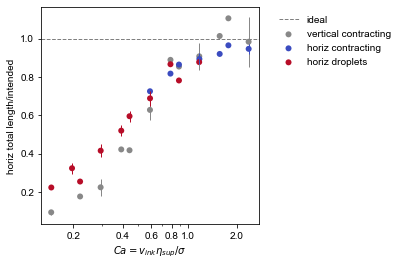

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [5]:
fig,ax = plt.subplots(1,1)
dx = 0.05
ss1 = ss.copy()
mp.simplifyType(ss1)
ss1 = ss1[ss1.sweepType=='speed_M']
cmap = cm.get_cmap('coolwarm') 
kwargs = {'logx':True, 'ax':ax, 'dx':dx, 'legend':True, 'legendloc':'right'}
mp.scatterSS(ss1, 'int_Ca', 'vert_hN', '', yideal=1, color='#888888', label='vertical contracting', **kwargs)
mp.scatterSS(ss1[(ss1.horiz_segments_manual==3)], 'int_Ca', 'horiz_totlenN', '', color=cmap(0), label='horiz contracting', **kwargs)
mp.scatterSS(ss1[(ss1.horiz_segments_manual>3)], 'int_Ca', 'horiz_totlenN', '', color=cmap(0.99), label='horiz droplets', **kwargs)
fig.savefig(os.path.join(cfg.path.fig, 'paper figures', 'supfigures', 'lengths_all.pdf'), bbox_inches='tight', dpi=300)

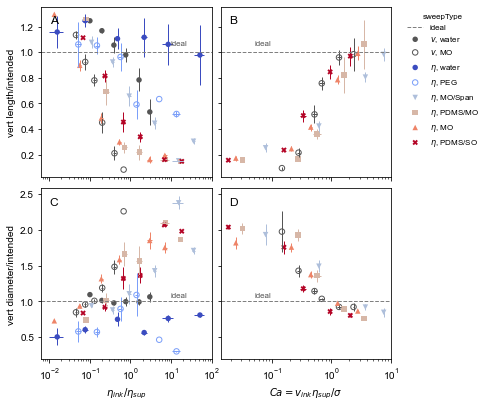

In [29]:
ss1 = ss.copy()
ss1 = ss1.sort_values(by='sigma')
mp.simplifyType(ss1)
me.plainTypes(ss1)
fs = 8
ms = 30
fig,axs = plt.subplots(2, 2,figsize=(6.5, 5.75), sharey='row', sharex='col')
for j,yvar in enumerate(['vert_hN', 'vert_meanTN']):
    for i,xvar in enumerate(['viscRatio', 'int_Ca']):
        kwargs = {'fontsize':fs, 'markersize':ms, 'fig':fig, 'logx':True, 'logy':False, 'ax':axs[j][i]
                  , 'legend':((i==1)&(j==0)), 'legendloc':'right', 'dx':0.2, 'set_ylabel':(i==0), 'set_xlabel':(j==1)}
        mp.sweepTypeSS(ss1, xvar, yvar, yideal=1, **kwargs)
for i in [0,1]:
    axs[i][0].text(10**1, 1.05, 'ideal', color='#555555', fontsize=fs)
    axs[i][1].text(0.5*10**-1, 1.05, 'ideal', color='#555555', fontsize=fs)

mp.subFigureLabels(axs)
fig.tight_layout()
plt.subplots_adjust(wspace=0.05, hspace=0.05)
fig.savefig(os.path.join(cfg.path.fig, 'figures', 'vert_metrics.svg'), bbox_inches='tight', dpi=300)

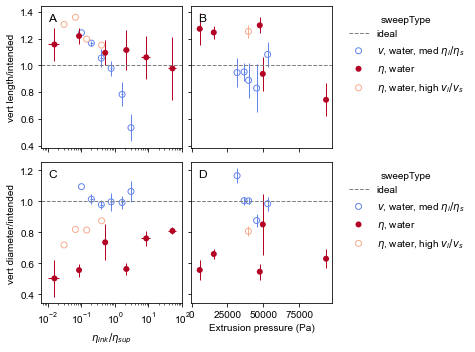

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [32]:
fig,axs = plt.subplots(2,2, figsize=(6.5,5), sharex='col', sharey='row')
ss1 = ss.copy()
ss1 = ss1[ss1.ink_base=='water']
me.plainTypes(ss1, incSweep=1, abbrev=True)
for j,xvar in enumerate(['viscRatio', 'pressureCh0']):
    for i,yvar in enumerate(['vert_hN', 'vert_meanTN']):
        mp.sweepTypeSS(ss1, xvar, yvar, ax=axs[i][j], yideal=1, dx=0.2
                       , logx=(j==0), legend=(j==1), legendloc='right'
                       , set_ylabel=(j==0), set_xlabel=(i==1))
for axrow in axs:
    for ax in axrow:
        mp.setSquare(ax)
fig.tight_layout()
mp.subFigureLabels(axs, inside=True)
fig.savefig(os.path.join(cfg.path.fig, 'paper figures', 'supfigures', 'vert_leaks.pdf'), bbox_inches='tight', dpi=300)

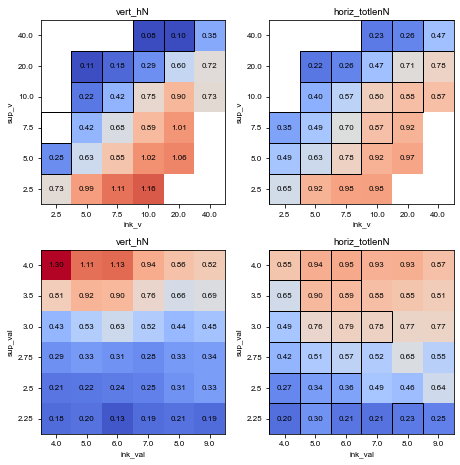

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [16]:
ss1 = ss.copy()
ss1 = ss1[ss1.sweepType=='speed_M_low_visc_ratio']
ss2 = ss.copy()
ss2 = ss2[ss2.sweepType=='visc_M']
fig,axs = plt.subplots(2,2, figsize=(6.5,6.5))
kwargs = {'logx':False, 'logy':False, 'dx':0, 'dy':0, 'vmin':0.1, 'vmax':1.3, 'legend':False}
mp.colorMeshSS(ss1, 'ink_v', 'sup_v', 'vert_hN', ax=axs[0][0], **kwargs)
mp.colorMeshSS(ss1, 'ink_v', 'sup_v', 'horiz_totlenN', ax=axs[0][1], **kwargs)
mp.colorMeshSS(ss2, 'ink_val', 'sup_val', 'vert_hN', ax=axs[1][0], **kwargs)
mp.colorMeshSS(ss2, 'ink_val', 'sup_val', 'horiz_totlenN', ax=axs[1][1], **kwargs)

for i,row in ss1.iterrows():
    xpos = [2.5, 5.0, 7.5, 10.0,20.0, 40].index(row['ink_v'])
    ypos = [2.5, 5.0, 7.5, 10.0,20.0, 40].index(row['sup_v'])
    if row['horiz_segments_manual']>3:    
        axs[0][1].add_patch(plt.Rectangle((xpos,ypos), 1,1, fill=False, edgecolor='black'))
    if row['vert_segments']>4:    
        axs[0][0].add_patch(plt.Rectangle((xpos,ypos), 1,1, fill=False, edgecolor='black'))

for i,row in ss2.iterrows():
    xpos = [4,5,6,7,8,9].index(row['ink_val'])
    ypos = [2.25,2.5,2.75,3,3.5,4].index(row['sup_val'])
    if row['horiz_segments_manual']>3:    
        axs[1][1].add_patch(plt.Rectangle((xpos,ypos), 1,1, fill=False, edgecolor='black'))
    if row['vert_segments']>4:    
        axs[1][0].add_patch(plt.Rectangle((xpos,ypos), 1,1, fill=False, edgecolor='black'))

fig.tight_layout()

In [19]:
ss.sweepType.unique()

array(['visc_W', 'visc_M', 'visc_MS', 'visc_PM', 'visc_PS', 'visc_PEG',
       'visc_W_high_v_ratio', 'speed_W_low_visc_ratio',
       'speed_W_int_visc_ratio', 'speed_W_high_visc_ratio',
       'speed_M_low_visc_ratio', 'speed_M_high_visc_ratio'], dtype=object)

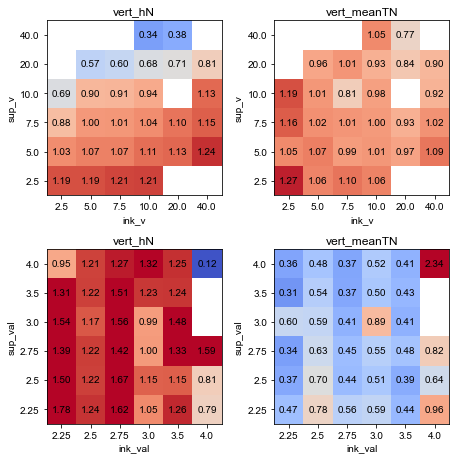

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [27]:
ss1 = ss.copy()
ss1 = ss1[ss1.sweepType=='speed_W_int_visc_ratio']
ss2 = ss.copy()
ss2 = ss2[ss2.sweepType=='visc_W']
fig,axs = plt.subplots(2,2, figsize=(6.5,6.5))
kwargs = {'logx':False, 'logy':False, 'dx':0, 'dy':0, 'vmin':0.1, 'vmax':1.3, 'legend':False}
mp.colorMeshSS(ss1, 'ink_v', 'sup_v', 'vert_hN', ax=axs[0][0], **kwargs)
mp.colorMeshSS(ss1, 'ink_v', 'sup_v', 'vert_meanTN', ax=axs[0][1], **kwargs)
mp.colorMeshSS(ss2, 'ink_val', 'sup_val', 'vert_hN', ax=axs[1][0], **kwargs)
mp.colorMeshSS(ss2, 'ink_val', 'sup_val', 'vert_meanTN', ax=axs[1][1], **kwargs)

for i,row in ss1.iterrows():
    xpos = [2.5, 5.0, 7.5, 10.0,20.0, 40].index(row['ink_v'])
    ypos = [2.5, 5.0, 7.5, 10.0,20.0, 40].index(row['sup_v'])
    if row['horiz_segments_manual']>3:    
        axs[0][1].add_patch(plt.Rectangle((xpos,ypos), 1,1, fill=False, edgecolor='black'))
    if row['vert_segments']>4:    
        axs[0][0].add_patch(plt.Rectangle((xpos,ypos), 1,1, fill=False, edgecolor='black'))

for i,row in ss2.iterrows():
    xpos = [2.25,2.5,2.75,3,3.5,4].index(row['ink_val'])
    ypos = [2.25,2.5,2.75,3,3.5,4].index(row['sup_val'])
    if row['horiz_segments_manual']>3:    
        axs[1][1].add_patch(plt.Rectangle((xpos,ypos), 1,1, fill=False, edgecolor='black'))
    if row['vert_segments']>4:    
        axs[1][0].add_patch(plt.Rectangle((xpos,ypos), 1,1, fill=False, edgecolor='black'))

fig.tight_layout()

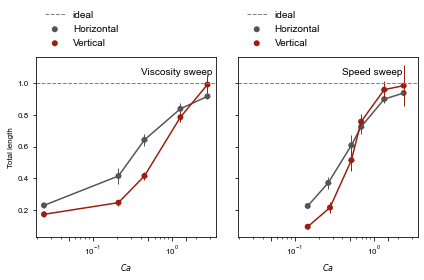

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [17]:
fig,axs = plt.subplots(1,2, figsize=(6, 4), sharex=True, sharey=True)

for i,st in enumerate(['visc_M', 'speed_M_low_visc_ratio']):
    kwargs = {'logx':True, 'ax':axs[i], 'dx':0.2, 'lines':True}
    mp.scatterSS(ss[ss.sweepType==st], 'int_Ca', 'horiz_totlenN', '', color='#555555', yideal=1, label='Horizontal', **kwargs)
    mp.scatterSS(ss[ss.sweepType==st], 'int_Ca', 'vert_hN', '', color='#9c1e10', label='Vertical', **kwargs)
for ax in axs:
    ax.set_xlabel('$Ca$')
    mp.setSquare(ax)
axs[0].set_ylabel('Total length')
axs[1].set_ylabel('')
axs[0].text(0.4, 1.05, 'Viscosity sweep')
axs[1].text(0.4, 1.05, 'Speed sweep')
fig.tight_layout()

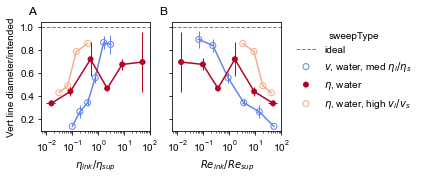

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [18]:
fig,axs = plt.subplots(1,2, figsize=(6, 4), sharex=True, sharey=True)

ss1 = ss.copy()
me.plainTypes(ss1, abbrev=True, incSweep=1)
for i,xvar in enumerate(['viscRatio', 'ReRatio']):
    kwargs = {'logx':True, 'ax':axs[i], 'dx':0.2, 'lines':True, 'yideal':1,
             'legend':(i==1), 'legendloc':'right'}
    mp.sweepTypeSS(ss1[ss1.ink_base=='water'], xvar, 'vert_meanTN', **kwargs)
axs[0].set_xlabel('$\eta_{ink}/\eta_{sup}$')
axs[1].set_xlabel('$Re_{ink}/Re_{sup}$')
axs[0].set_ylabel('Vert line diameter/intended')
axs[1].set_ylabel('')
fig.tight_layout()
mp.subFigureLabels(axs, inside=False)
plt.subplots_adjust(wspace=0, hspace=0)

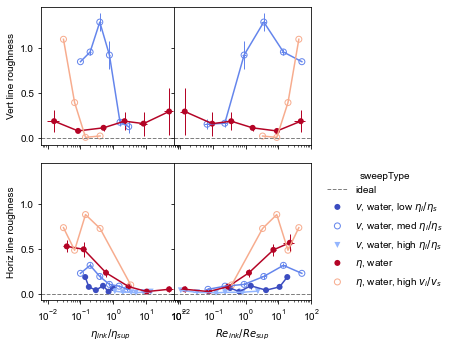

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [19]:
fig,axs = plt.subplots(2,2, figsize=(6, 5), sharex=True, sharey=True)

ss1 = ss.copy()
me.plainTypes(ss1, abbrev=True, incSweep=1)
for j,yvar in enumerate(['vert_roughness', 'horiz_roughness']):
    for i,xvar in enumerate(['viscRatio', 'ReRatio']):
        kwargs = {'logx':True, 'ax':axs[j][i], 'dx':0.2, 'lines':True, 'yideal':0,
                 'legend':((i==1)&(j==1)), 'legendloc':'right'}
        mp.sweepTypeSS(ss1[ss1.ink_base=='water'], xvar, yvar, **kwargs)
axs[0][0].set_xlabel('')
axs[0][1].set_xlabel('')
axs[0][0].set_ylabel('Vert line roughness')
axs[0][1].set_ylabel('')
axs[1][0].set_xlabel('$\eta_{ink}/\eta_{sup}$')
axs[1][1].set_xlabel('$Re_{ink}/Re_{sup}$')
axs[1][0].set_ylabel('Horiz line roughness')
axs[1][1].set_ylabel('')
fig.tight_layout()
plt.subplots_adjust(wspace=0, hspace=0)

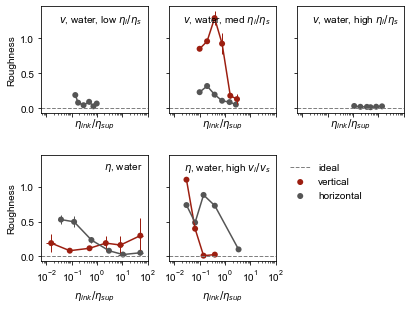

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [20]:
ss1 = ss.copy()
ss1 = ss1[ss1.ink_base=='water']
# mp.simplifyType(ss1)
me.plainTypes(ss1, incSweep=1, abbrev=True)
fig,axs = plt.subplots(2,3, figsize=(6.5, 5), sharex=True, sharey=True)
axs[1][2].remove()
for i,st1 in enumerate(['$v', '$\eta']):
    for j,st in enumerate(ss1[ss1.sweepType.str.startswith(st1)].sweepType.unique()):
        kwargs = {'logx':True, 'ax':axs[i][j], 'dx':0.2, 'lines':True, 
                 'legend':(i==1)&(j==1), 'legendloc':'right'}
        mp.scatterSS(ss1[ss1.sweepType==st], 'viscRatio', 'vert_roughness','', color='#9c1e10', yideal=0, label='vertical', **kwargs)
        mp.scatterSS(ss1[ss1.sweepType==st], 'viscRatio', 'horiz_roughness','', color='#555555', label='horizontal', **kwargs)
        axs[i][j].text(0.95, 0.95, st, horizontalalignment='right', verticalalignment='top', transform=axs[i][j].transAxes)
for axrow in axs:
    for ax in axrow:
        ax.set_xlabel('$\eta_{ink}/\eta_{sup}$')
        mp.setSquare(ax)
        ax.set_ylabel('')
    axrow[0].set_ylabel('Roughness')

plt.subplots_adjust(wspace=0, hspace=0)
fig.savefig(os.path.join(cfg.path.fig, 'paper figures', 'supfigures', 'roughness_compare.pdf'), bbox_inches='tight', dpi=300)